In [4]:
# Install pip packages in the current Jupyter kernel

import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib==3.0.3
# !{sys.executable} -m pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import json

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우를 제거 
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 라인
%matplotlib inline
# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 함
import os
os.getcwd() # 현재 디렉토리 파악
os.chdir(r"D:\heeju\특화 프로젝트\DataAnalysis\DataSet") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import matplotlib.pyplot as plt 
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

# 한글이 들어간 csv는 encoding 인자를 넣어주는 것이 좋음
df=pd.read_csv("서울시 상권분석서비스(상주인구-상권).csv",encoding='euc-kr') 
df.head()

# 데이터 shape 파악
df.shape

(3264, 29)

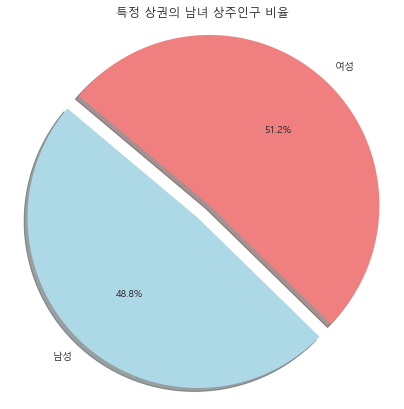

In [18]:
# 기준_년분기_코드를 날짜 형식으로 변환
df['기준_년분기_코드'] = pd.to_datetime(df['기준_년분기_코드'], format='%Y%m')

# 새로운 년도 열 생성
df['Year'] = df['기준_년분기_코드'].dt.year

# 특정 상권 코드 설정
target_market_code = 3110014

# 특정 상권에 해당하는 데이터 필터링
target_market_data = df[df['상권_코드'] == target_market_code]

# 남성과 여성 상주인구 수 추출
male_population = target_market_data[target_market_data['Year'] == 2023]['남성_상주인구_수'].sum()
female_population = target_market_data[target_market_data['Year'] == 2023]['여성_상주인구_수'].sum()

# 파이차트 그리기
labels = ['남성', '여성']
sizes = [male_population, female_population]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # 강조를 위해 첫 번째 조각을 조금 벗어나도록 설정
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('특정 상권의 남녀 상주인구 비율')
plt.axis('equal')
plt.show()

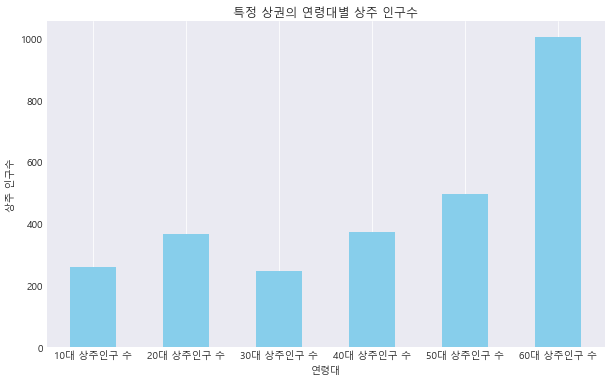

In [17]:
# 기준_년분기_코드를 날짜 형식으로 변환
df['기준_년분기_코드'] = pd.to_datetime(df['기준_년분기_코드'], format='%Y%m')

# 새로운 년도 열 생성
df['Year'] = df['기준_년분기_코드'].dt.year

# 특정 상권 코드 설정
target_market_code = 3110014

# 특정 상권에 해당하는 데이터 필터링
target_market_data = df[df['상권_코드'] == target_market_code]

# 연령대별 상주 인구수 컬럼 선택
age_columns = ['연령대_10_상주인구_수', '연령대_20_상주인구_수', '연령대_30_상주인구_수',
               '연령대_40_상주인구_수', '연령대_50_상주인구_수', '연령대_60_이상_상주인구_수']

# 연령대별 상주 인구수 합계 계산
age_population = target_market_data[target_market_data['Year'] == 2023][age_columns].sum()

# 시간대 라벨 수정
age_labels = [f'{age[4:6]}대 상주인구 수' for age in age_columns]

# 바 차트 그리기
plt.figure(figsize=(10, 6))
age_population.plot(kind='bar', color='skyblue')
plt.title('특정 상권의 연령대별 상주 인구수')
plt.xlabel('연령대')
plt.ylabel('상주 인구수')
plt.xticks(range(len(age_labels)), age_labels, rotation=0)
plt.grid(axis='y')
plt.show()

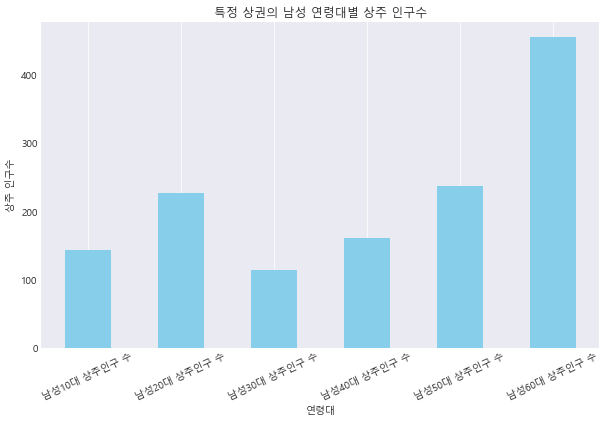

In [16]:
# 기준_년분기_코드를 날짜 형식으로 변환
df['기준_년분기_코드'] = pd.to_datetime(df['기준_년분기_코드'], format='%Y%m')

# 새로운 년도 열 생성
df['Year'] = df['기준_년분기_코드'].dt.year

# 특정 상권 코드 설정
target_market_code = 3110014

# 특정 상권에 해당하는 데이터 필터링
target_market_data = df[df['상권_코드'] == target_market_code]

# 연령대별 상주 인구수 컬럼 선택 (남성)
male_age_columns = ['남성연령대_10_상주인구_수', '남성연령대_20_상주인구_수', '남성연령대_30_상주인구_수',
                    '남성연령대_40_상주인구_수', '남성연령대_50_상주인구_수', '남성연령대_60_이상_상주인구_수']

# 연령대별 상주 인구수 합계 계산 (남성)
male_age_population = target_market_data[target_market_data['Year'] == 2023][male_age_columns].sum()

# 시간대 라벨 수정
age_labels = [f'남성{age[6:8]}대 상주인구 수' for age in male_age_columns]

# 바 차트 그리기
plt.figure(figsize=(10, 6))
male_age_population.plot(kind='bar', color='skyblue')
plt.title('특정 상권의 남성 연령대별 상주 인구수')
plt.xlabel('연령대')
plt.ylabel('상주 인구수')
plt.xticks(range(len(age_labels)), age_labels, rotation=25)
plt.grid(axis='y')
plt.show()

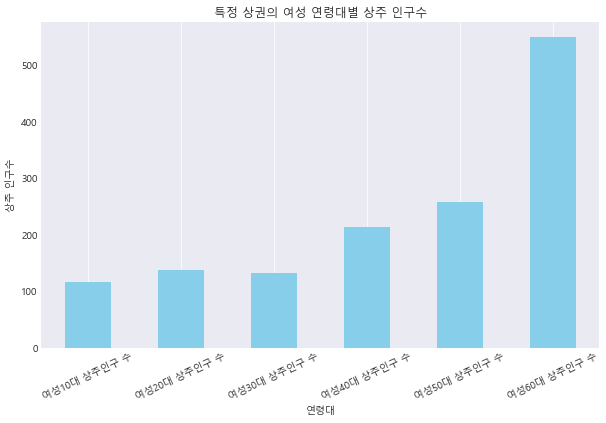

In [6]:
# 기준_년분기_코드를 날짜 형식으로 변환
df['기준_년분기_코드'] = pd.to_datetime(df['기준_년분기_코드'], format='%Y%m')

# 새로운 년도 열 생성
df['Year'] = df['기준_년분기_코드'].dt.year

# 특정 상권 코드 설정
target_market_code = 3110014

# 특정 상권에 해당하는 데이터 필터링
target_market_data = df[df['상권_코드'] == target_market_code]

# 연령대별 상주 인구수 컬럼 선택 (남성)
female_age_columns = ['여성연령대_10_상주인구_수', '여성연령대_20_상주인구_수', '여성연령대_30_상주인구_수',
                    '여성연령대_40_상주인구_수', '여성연령대_50_상주인구_수', '여성연령대_60_이상_상주인구_수']

# 연령대별 상주 인구수 합계 계산 (남성)
female_age_population = target_market_data[target_market_data['Year'] == 2023][female_age_columns].sum()

# 시간대 라벨 수정
age_labels = [f'여성{age[6:8]}대 상주인구 수' for age in female_age_columns]

# 바 차트 그리기
plt.figure(figsize=(10, 6))
female_age_population.plot(kind='bar', color='skyblue')
plt.title('특정 상권의 여성 연령대별 상주 인구수')
plt.xlabel('연령대')
plt.ylabel('상주 인구수')
plt.xticks(range(len(age_labels)), age_labels, rotation=25)
plt.grid(axis='y')
plt.show()

# # DataFrame을 JSON으로 변환
# json_data = target_market_data[target_market_data['Year'] == 2023][female_age_columns].to_json(orient='records',encoding='utf-8')

# # JSON 파일로 저장
# with open('female_age_population.json', 'w') as f:
#     f.write(json_data)

# 바 차트 데이터
bar_chart_data = {
    'labels': age_labels,
    'values': female_age_population.tolist(),
    'title': '특정 상권의 여성 연령대별 상주 인구수',
    'xlabel': '연령대',
    'ylabel': '상주 인구수'
}

# JSON으로 변환
json_data = json.dumps(bar_chart_data, ensure_ascii=False, indent=4)

# JSON 파일로 저장
with open('bar_chart_data.json', 'w', encoding='utf-8') as f:
    f.write(json_data)

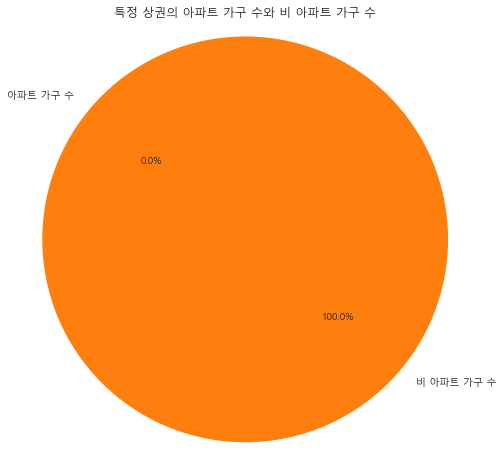

In [13]:
# 기준_년분기_코드를 날짜 형식으로 변환
df['기준_년분기_코드'] = pd.to_datetime(df['기준_년분기_코드'], format='%Y%m')

# 새로운 년도 열 생성
df['Year'] = df['기준_년분기_코드'].dt.year

# 특정 상권 코드 설정
target_market_code = 3110014

# 특정 상권에 해당하는 데이터 필터링
target_market_data = df[df['상권_코드'] == target_market_code]

# 아파트 가구 수와 비 아파트 가구 수 데이터 추출
apartment_households = target_market_data['아파트_가구_수'].sum()
non_apartment_households = target_market_data['비_아파트_가구_수'].sum()

# 파이 차트 데이터 생성
pie_chart_data = {
    'labels': ['아파트 가구 수', '비 아파트 가구 수'],
    'values': [apartment_households, non_apartment_households],
    'title': '특정 상권의 아파트 가구 수와 비 아파트 가구 수'
}

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(pie_chart_data['values'], labels=pie_chart_data['labels'], autopct='%1.1f%%', startangle=140)
plt.title(pie_chart_data['title'])
plt.axis('equal')
plt.show()

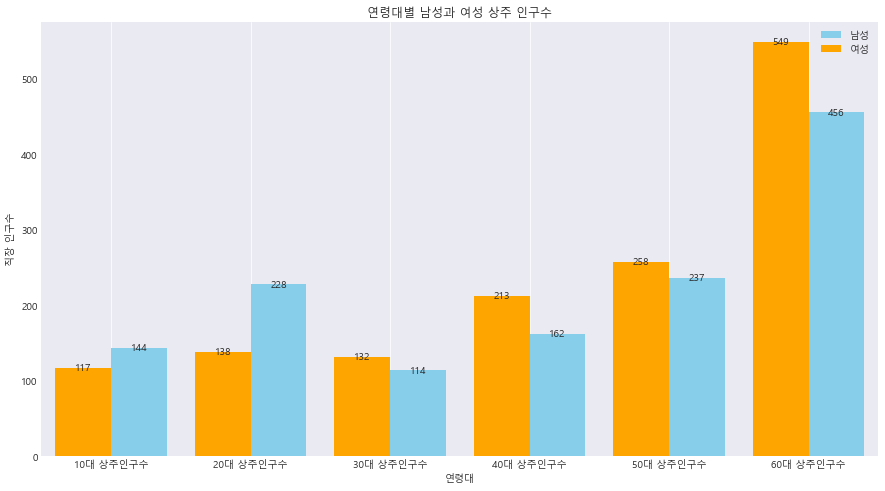

In [29]:
# 연령대별 직장 인구수 컬럼 선택
male_age_columns = ['남성연령대_10_상주인구_수', '남성연령대_20_상주인구_수', '남성연령대_30_상주인구_수',
                    '남성연령대_40_상주인구_수', '남성연령대_50_상주인구_수', '남성연령대_60_이상_상주인구_수']

female_age_columns =  ['여성연령대_10_상주인구_수', '여성연령대_20_상주인구_수', '여성연령대_30_상주인구_수',
                    '여성연령대_40_상주인구_수', '여성연령대_50_상주인구_수', '여성연령대_60_이상_상주인구_수']

# 각 연령대별 직장 인구수 합산 (남성, 여성)
male_age_population = target_market_data[target_market_data['Year'] == 2023][male_age_columns].sum()
female_age_population = target_market_data[target_market_data['Year'] == 2023][female_age_columns].sum()

# 바 차트 그리기
plt.figure(figsize=(15,8))
male_age_population.plot(kind='bar', color='skyblue', position=0, width=0.4, label='남성')
female_age_population.plot(kind='bar', color='orange', position=1, width=0.4, label='여성')

plt.title('연령대별 남성과 여성 상주 인구수')
plt.xlabel('연령대')
plt.ylabel('직장 인구수')
plt.xticks(range(len(male_age_columns)), [f'{age.split("_")[1]}대 상주인구수' for age in male_age_columns], rotation=0)
plt.legend()
plt.legend()
plt.grid(axis='y')
# y축 값 표시
for i, value in enumerate(female_age_population):
    plt.text(i - 0.2, value, f'{value}', ha='center', va='center')
    
for i, value in enumerate(male_age_population):
    plt.text(i + 0.2, value, f'{value}', ha='center', va='center')

# x 축 범위 설정
plt.xlim(left=-0.5, right=len(male_age_population) - 0.5)

plt.show()